In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [90]:
data = pd.read_csv("../src/scores.txt", delimiter="~")

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 6 columns):
test_loss        111 non-null float64
train_loss       111 non-null float64
learning_rate    111 non-null float64
lr_decay         111 non-null float64
drop_out         111 non-null float64
batch_size       111 non-null int64
dtypes: float64(5), int64(1)
memory usage: 5.3 KB


In [92]:
data.head()

,test_loss,train_loss,learning_rate,lr_decay,drop_out,batch_size
0,0.26522,0.17990,0.006921,0.000001,0.576119,8
1,0.24839,0.04267,0.004684,0.000067,0.166472,128
2,0.17498,0.04409,0.007602,0.000987,0.393835,32
3,0.22570,0.08576,0.004852,0.000016,0.375168,32
4,0.21540,0.12556,0.000744,0.000006,0.431037,16


In [60]:
# data.loc[:, "lr2"] = data.loc[:, "learning_rate"]**2
# data.loc[:, "lr_decay2"] = data.loc[:, "lr_decay"]**2
# data.loc[:, "drop_out2"] = data.loc[:, "drop_out"]**2
# data.loc[:, "batch_size2"] = data.loc[:, "batch_size"]**2

(array([  6.,  11.,  25.,  30.,  15.,   9.,   4.,   0.,   2.,   0.,   0.,
          3.,   1.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,
          1.,   0.,   1.]),
 array([ 0.01514  ,  0.0465908,  0.0780416,  0.1094924,  0.1409432,
         0.172394 ,  0.2038448,  0.2352956,  0.2667464,  0.2981972,
         0.329648 ,  0.3610988,  0.3925496,  0.4240004,  0.4554512,
         0.486902 ,  0.5183528,  0.5498036,  0.5812544,  0.6127052,
         0.644156 ,  0.6756068,  0.7070576,  0.7385084,  0.7699592,  0.80141  ]),
 <a list of 25 Patch objects>)

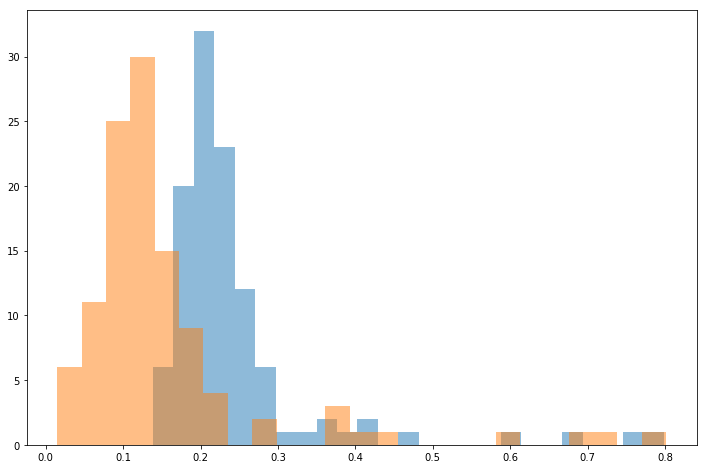

In [93]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.hist(data.loc[:, "test_loss"], bins= 25, alpha=0.5)
ax.hist(data.loc[:, "train_loss"], bins=25, alpha=0.5)

### Train test split

In [106]:
y_data = data.loc[:, "test_loss"].values

# drop labels
x_data = data.drop("test_loss", axis=1)
x_data = x_data.drop("train_loss", axis=1)

print(x_data.info())
# scale data
##### Standardize data
scaler = StandardScaler()
x_data = scaler.fit_transform(x_data)

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=1337)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 4 columns):
learning_rate    111 non-null float64
lr_decay         111 non-null float64
drop_out         111 non-null float64
batch_size       111 non-null int64
dtypes: float64(3), int64(1)
memory usage: 3.5 KB
None


In [107]:
model = linear_model.LinearRegression()
model = model.fit(X_train, y_train)

print(model.coef_)

preds = model.predict(X_test)

print("R2", r2_score(y_test, preds))

[-0.02733611  0.04089115  0.01270226  0.0059468 ]
('R2', 0.14808555328780981)


In [108]:
print(model.predict(X_test[14, :].reshape(1, -1)))

[ 0.41846065]


In [110]:
for x in range(100):
    lr = np.random.uniform(0.00001, 0.0075)
    drop_out = np.random.uniform(0.15, 0.60)

    batches = [16, 24, 32, 48, 64]
    batch_size = batches[np.random.randint(0, len(batches) - 1)]
    lr_decay = np.random.uniform(-10, -3.3)
    lr_decay = 4**lr_decay
    
    t_data = np.array([lr, lr_decay, drop_out, batch_size]).reshape(1, -1)
    result = model.predict(t_data)
    
    print result[0]
    if result[0] < 0.18:
        print t_data
    
    

0.340429698213
0.437244663722
0.436575887913
0.435479169345
0.34090742895
0.439008841784
0.392024584807
0.391618174045
0.340368491413
0.387026987343
0.438564390275
0.342855944478
0.339751609251
0.5293437865
0.434737508866
0.531486677726
0.342256099861
0.34322621438
0.389473180084
0.437273971654
0.439031752681
0.388081632538
0.438490736137
0.435030114728
0.436544456228
0.388881408518
0.339579228186
0.344308640272
0.530812684919
0.438122133998
0.434784305069
0.434494414366
0.434843948962
0.342027138502
0.39100976609
0.434657618329
0.53392979544
0.438514062467
0.43811235213
0.387080653895
0.39137330298
0.33969824585
0.39038208167
0.532743635837
0.436473348743
0.532429004738
0.387356824142
0.531096456114
0.53311623944
0.531306841957
0.437821977906
0.3431908239
0.437039134042
0.434593359191
0.386851324059
0.438315645449
0.438562012276
0.532863838012
0.434528835751
0.386952059777
0.434536108493
0.530402771419
0.390252030737
0.391897376764
0.529911124848
0.534807046203
0.339892127764
0.439542